In [14]:
import pipeline as pipeline
print(pipeline.__file__)

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py


In [15]:
input_dir  = './input_data'
stage_dirs = ['amd_sim_data', 'amd_sim_data_Early', 'amd_sim_data_Intermediate', 'amd_sim_data_Late-dry', 'amd_sim_data_Late-wet']
stage      = stage_dirs[4] # Wet

pm_model = pipeline.initiliaze_pipeline(f'{input_dir}/{stage}', verbose=True)

number of rows: 331
number of unique location_id: 28
number of nodes: 233
number of edges: 232


In [16]:
rate_types = ['beta_binom', 'binom', 'neg_binom', 'poisson', 'log_normal', 'normal', 'offset_log_normal']
rate_type = rate_types[2]

pipeline.generate_pymc_objects(pm_model, rate_type=rate_type, include_covariates=False)

Standard errors replaced: 0
Effective sample sizes filled: 0


In [17]:
map_estimate = pipeline.return_map_estimate(pm_model=pm_model, verbose=True)

INFO:pipeline:  ▶ pm.find_MAP() 수행 중...


In [18]:
idata = pipeline.return_idata(pm_model     = pm_model, 
                            map_estimate   = map_estimate, 
                            draws          = 2000,
                            tune           = 1000,
                            chains         = 4,
                            cores          = 4,
                            target_accept  = 0.9,
                            max_treedepth  = 10,
                            use_advi       = False,
                            use_metropolis = True,
                            verbose=True
                            ) 

INFO:pipeline:  ▶ Metropolis 샘플링 수행 중...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc:CompoundStep
>Metropolis: [gamma_p]
INFO:pymc:>Metropolis: [gamma_p]
>Metropolis: [eta_p]
INFO:pymc:>Metropolis: [eta_p]


/Users/thp01/miniforge3/envs/amd/lib/python3.9/site-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/thp01/miniforge3/envs/amd/lib/python3.9/site-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/thp01/miniforge3/envs/amd/lib/python3.9/site-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/thp01/miniforge3/envs/amd/lib/python3.9/site-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
INFO:pymc:Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat

In [19]:
summary_df = pipeline.return_rhat(idata)

Total vars:    1279
R-hat > 1.01:  24
R-hat <= 1.01:  1199
R-hat missing: 56
<xarray.Dataset> Size: 20kB
Dimensions:               (knot: 6, age: 93, cum_sum_mu_p_dim_0: 93,
                           mu_interval_p_dim_0: 331, obs_dim: 331,
                           p_pred_p_dim_0: 331)
Coordinates:
  * knot                  (knot) float64 48B 2.0 30.0 45.0 60.0 80.0 94.0
  * age                   (age) float64 744B 2.0 3.0 4.0 5.0 ... 92.0 93.0 94.0
  * cum_sum_mu_p_dim_0    (cum_sum_mu_p_dim_0) int64 744B 0 1 2 3 ... 90 91 92
  * mu_interval_p_dim_0   (mu_interval_p_dim_0) int64 3kB 0 1 2 ... 328 329 330
  * obs_dim               (obs_dim) int64 3kB 0 1 2 3 4 ... 326 327 328 329 330
  * p_pred_p_dim_0        (p_pred_p_dim_0) int64 3kB 0 1 2 3 ... 327 328 329 330
Data variables:
    gamma_p               (knot) float64 48B 1.047 1.023 1.002 1.002 1.005 1.01
    eta_p                 float64 8B 1.003
    mu_age_p              (age) float64 744B 1.046 1.044 1.045 ... 1.009 1.01
    con

In [20]:
pred = pipeline.predict_for(pm_model            = pm_model,
                            idata               = idata, 
                            root_area           = 'Global',
                            root_sex            = 'Both',
                            root_year           = 2009,
                            area                = 'Global',
                            sex                 = 'Female',
                            year                = 2005,
                            population_weighted = 1.0,
                            lower               = 0.0,
                            upper               = 1.0,
                            include_covariates  = False
                            )

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py:730: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpd = pm.stats.hdi(pred, hdi_prob=0.95)


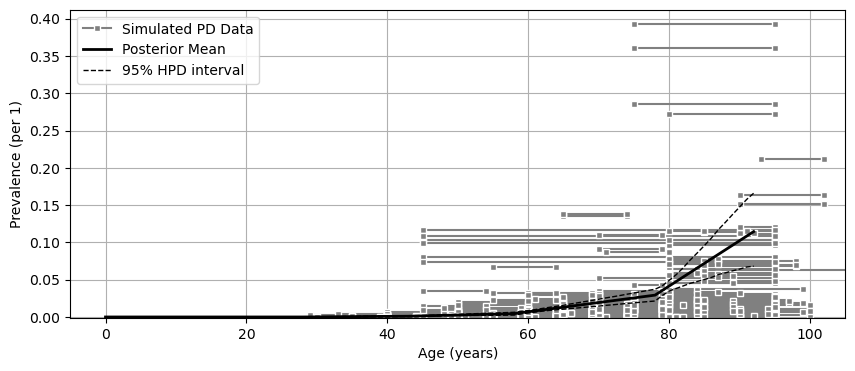

In [21]:
pipeline.visualize_pred(pred, pm_model.shared_data["data"])

/Users/Dev/AMD/dismod_mr_migrated/reforged_mr/pipeline.py:730: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hpd = pm.stats.hdi(pred, hdi_prob=0.95)


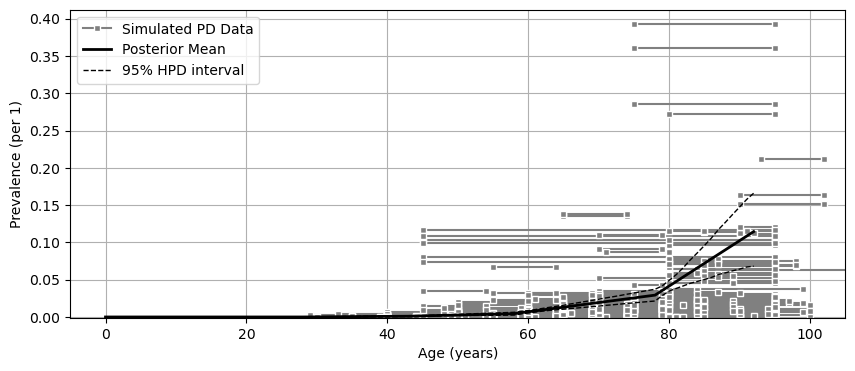

In [23]:
pred = pipeline.predict_for(pm_model            = pm_model,
                            idata               = idata, 
                            root_area           = 'Republic of Korea',
                            root_sex            = 'Male',
                            root_year           = 1900,
                            area                = 'Republic of Korea', # area affects nothing
                            sex                 = 'Male',
                            year                = 1900,
                            population_weighted = 1.0,
                            lower               = 0.0,
                            upper               = 1.0,
                            include_covariates  = False
                            )
pipeline.visualize_pred(pred, pm_model.shared_data["data"])

In [4]:
# Execute above cells